In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_Data/",one_hot=True)

Extracting MNIST_Data/train-images-idx3-ubyte.gz
Extracting MNIST_Data/train-labels-idx1-ubyte.gz
Extracting MNIST_Data/t10k-images-idx3-ubyte.gz
Extracting MNIST_Data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
# Visualize a single image
print(mnist.train.num_examples)
print(mnist.test.num_examples)

55000
10000


In [6]:
single_image = mnist.train.images[444]

In [7]:
print(mnist.train.images.shape)
print(single_image.shape)

(55000, 784)
(784,)


In [8]:
single_image = single_image.reshape((28,28))

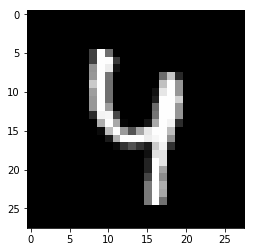

In [9]:
plt.imshow(single_image, cmap='gist_gray')

# Now Making the MNIST Classification Model

In [10]:
x = tf.placeholder(tf.float32,shape=(None, 784))
m1 = tf.Variable(initial_value=tf.random_normal(shape=(784,20)))
c1 = tf.Variable(initial_value=tf.random_normal(shape=[20]))

In [11]:
# Creating the 1st Layer
Z1 = tf.matmul(x,m1)
Y1 = tf.add(Z1,c1)

In [12]:
# Creating the 2st Layer
m2 = tf.Variable(initial_value=tf.random_normal(shape=(20,10)))
c2 = tf.Variable(initial_value=tf.random_normal(shape=[10]))
Z2 = tf.matmul(Y1,m2)
Y2 = tf.add(Z2,c2)

In [13]:
# Loss function
y_true = tf.placeholder(tf.float32, shape = (None,10))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=Y2))

In [14]:
# Setting the Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

In [15]:
# training variable
train = optimizer.minimize(cross_entropy)

In [16]:
# Initializing and Starting the Training of the model
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [17]:
with tf.Session() as sess:
    sess.run(init)
    
    for steps in range(100000):
        batch_x, batch_y = mnist.train.next_batch(44)
        sess.run(train, feed_dict = {y_true:batch_y , x:batch_x})
        
    saver.save(sess,"models/MNIST_using_ANN.ckpt")
    
    # Evaluate the Model
    correct_predictions = tf.equal(tf.argmax(Y2,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))
    print(sess.run(acc, feed_dict = {y_true:mnist.test.labels , x:mnist.test.images}))

0.9234
